In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Medias ponderadas exponencialmente
**Exponentially weighted averages (EWA)**

Las medias ponderadas exponencialmente (EWA) se utilizan para suavizar datos ruidosos basándose en un parámetro BETA, donde los valores suavizados representan una aproximación de las medias calculadas sobre N valores anteriores siendo N= (1 / (1 - BETA)). Es decir que si BETA=0.9 cada valor de media corresponde al promedio de los últimos 10 valores donde cada uno es ponderado de manera exponencial. Son 10 porque N=1/(1-0.9)=1/0.1=10.

Text(0, 0.5, 'Cantidad de términos usados')

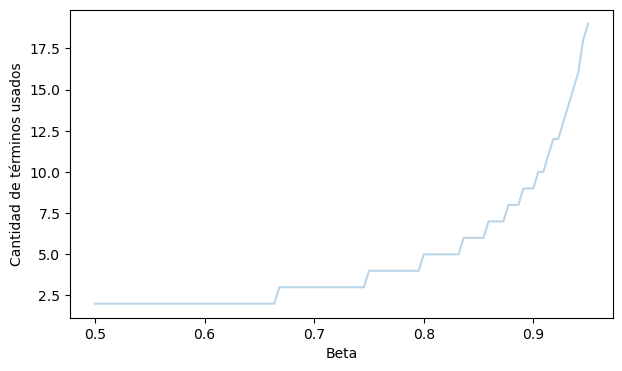

In [2]:
beta = np.linspace(0.5, 0.95, num=100)
y = 1//(1-beta)
plt.figure(figsize=(7,4))
plt.plot(beta, y, alpha=0.3, ms=4)
plt.xlabel("Beta")
plt.ylabel("Cantidad de términos usados")

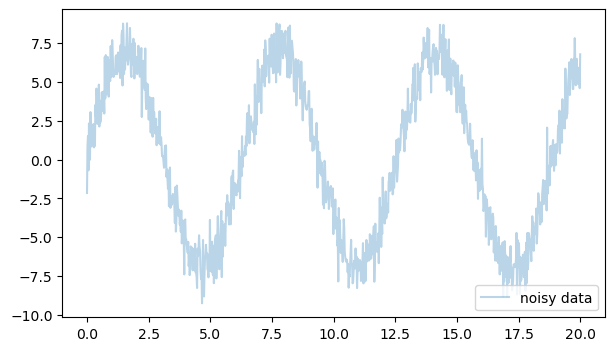

In [3]:
x = np.linspace(0.0, 2.0, num=1000) *10
noise = np.random.normal(scale=1.0,size=len(x))
y = 7*np.sin(x) + noise

plt.figure(figsize=(7,4))
plt.plot(x, y, alpha=0.3, ms=4, label='data')
plt.legend(['noisy data'], loc='lower right')

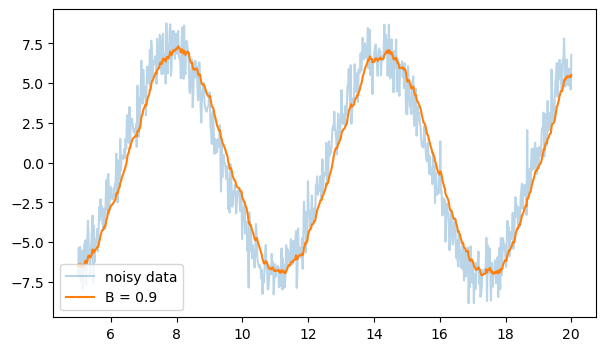

In [4]:
beta = 0.9
v = 0.0
ewa90 = []
for t in y:
  v = beta * v + (1-beta) * t
  ewa90.append(v)

beta = 0.98
v = 0.0
ewa98 = []
for t in y:
  v = beta * v + (1-beta) * t
  ewa98.append(v)

ini = len(y)//4
fin = len(y)
plt.figure(figsize=(7,4))
plt.plot(x[ini:fin], y[ini:fin], alpha=0.3, ms=4, label='data')
plt.plot(x[ini:fin], ewa90[ini:fin])
#plt.plot(x[ini:fin], ewa98[ini:fin])
#plt.legend(['noisy data', 'B = 0.9', 'B = 0.98'], loc='lower right')
plt.legend(['noisy data', 'B = 0.9'], loc='lower left')

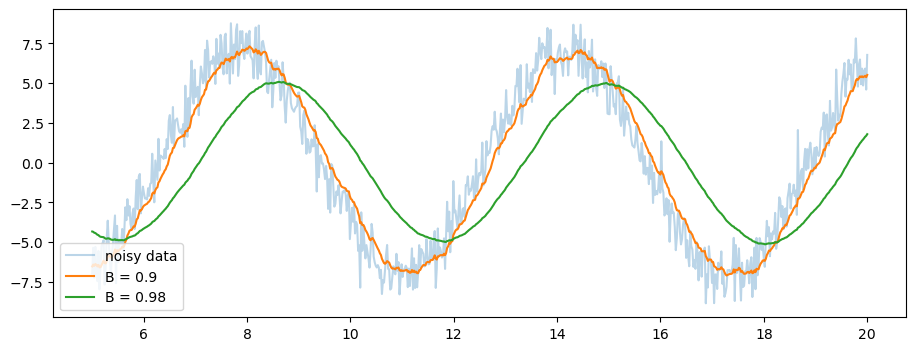

In [5]:
ini = len(y)//4
fin = len(y)

plt.figure(figsize=(11,4))
plt.plot(x[ini:fin], y[ini:fin], alpha=0.3, ms=4, label='data')
plt.plot(x[ini:fin], ewa90[ini:fin])
plt.plot(x[ini:fin], ewa98[ini:fin])
plt.legend(['noisy data', 'B = 0.9', 'B = 0.98'], loc='lower left')

In [6]:
beta = 0.999
epsilon = 10e-08
v = 0.0
RMSProp = []
for t in y:
    v = beta * v + (1-beta) * ( t * t )
    RMSProp.append( t / np.sqrt(v+epsilon) )
    
    

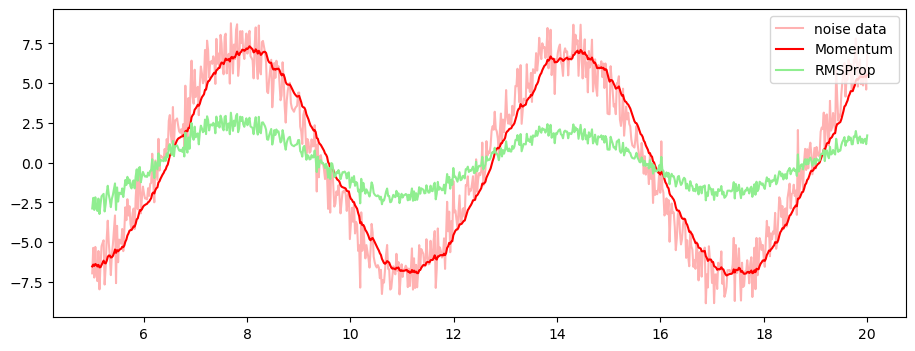

In [7]:
plt.figure(figsize=(11,4))
ini = len(y)//4
fin = len(y)
plt.plot(x[ini:fin], y[ini:fin],  alpha=0.3, ms=4, label='data', color='red')
plt.plot(x[ini:fin], ewa90[ini:fin],'r')
plt.plot(x[ini:fin], RMSProp[ini:fin], color='lightgreen')
plt.legend(['noise data', 'Momentum', 'RMSProp'], loc='upper right')


In [8]:
beta1 = 0.9
beta2 = 0.999
epsilon = 10e-08
v1 = 0.0
v2 = 0.0
Adam = []
for t in y:
    v1 = beta1 * v1 + (1-beta1) * t  
    v2 = beta2 * v2 + (1-beta2) * ( t * t )
    Adam.append( v1 / np.sqrt(v2+epsilon) )

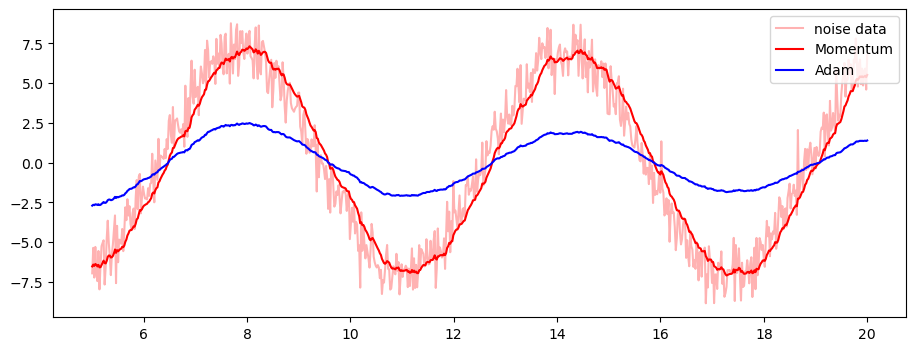

In [9]:
plt.figure(figsize=(11,4))
ini = len(y)//4
fin = len(y)
plt.plot(x[ini:fin], y[ini:fin],  alpha=0.3, ms=4, label='data', color='red')
plt.plot(x[ini:fin], ewa90[ini:fin], 'r')
plt.plot(x[ini:fin], Adam[ini:fin], 'b')
plt.legend(['noise data', 'Momentum', 'Adam'], loc='upper right')

### Comparacion

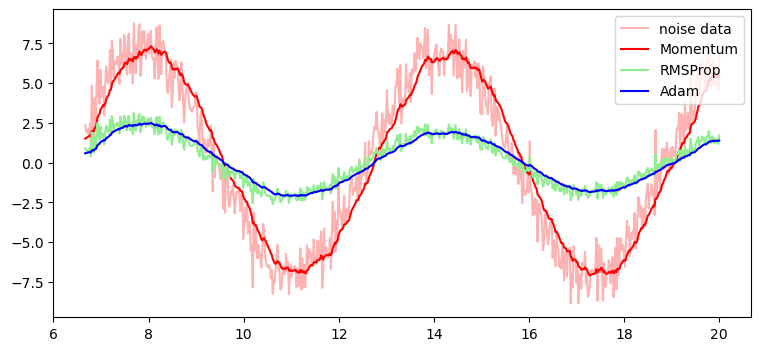

In [10]:
plt.figure(figsize=(9,4))
ini = len(y)//3
fin = len(y)
plt.plot(x[ini:fin], y[ini:fin],  alpha=0.3, ms=4, label='data', color='red')
plt.plot(x[ini:fin], ewa90[ini:fin], 'r')
plt.plot(x[ini:fin], RMSProp[ini:fin], color='lightgreen')
plt.plot(x[ini:fin], Adam[ini:fin], 'b')
plt.legend(['noise data', 'Momentum', 'RMSProp','Adam'], loc='upper right')

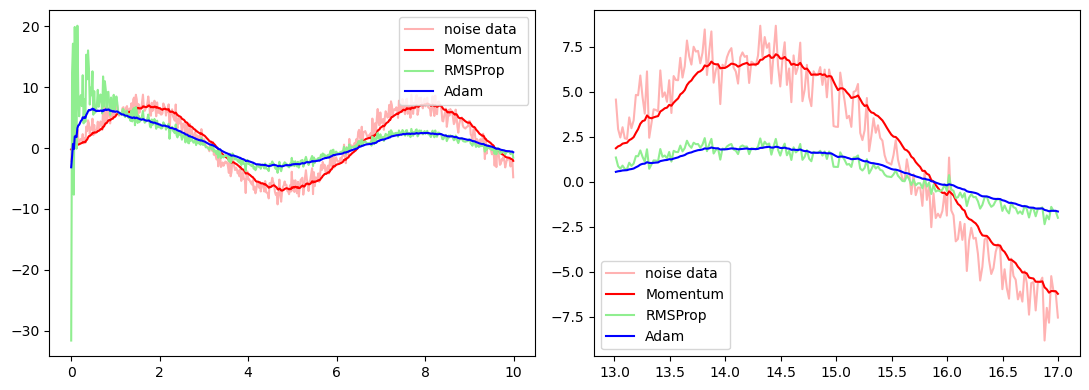

In [11]:
# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))

# Primera gráfica en el subplot ax1
ini = 0
fin = len(y)//2
ax1.plot(x[ini:fin], y[ini:fin],  alpha=0.3, ms=4, label='data', color='red')
ax1.plot(x[ini:fin], ewa90[ini:fin],'r')
ax1.plot(x[ini:fin], RMSProp[ini:fin], color='lightgreen')
ax1.plot(x[ini:fin], Adam[ini:fin], 'b')
ax1.legend(['noise data', 'Momentum', 'RMSProp', 'Adam'], loc='upper right')
#ax1.set_title("Comparación con RMSProp")

# Segunda gráfica en el subplot ax2
ini = 13*len(y)//20
fin = 17*len(y)//20
ax2.plot(x[ini:fin], y[ini:fin],  alpha=0.3, ms=4, label='data', color='red')
ax2.plot(x[ini:fin], ewa90[ini:fin], 'r')
ax2.plot(x[ini:fin], RMSProp[ini:fin], color='lightgreen')
ax2.plot(x[ini:fin], Adam[ini:fin], 'b')
ax2.legend(['noise data', 'Momentum', 'RMSProp', 'Adam'], loc='lower left')
#ax2.set_title("Comparación con Adam")

# Ocultar los números de los ejes en ambas figuras
'''
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
'''
# Mostrar la figura
plt.tight_layout()
plt.show()